# Partie 1 : Données de travail


In [25]:
import matplotlib.pyplot as plt
import pandas as pd

fromage = pd.read_table("fromage1.txt", sep="\t", header=0, index_col=0)

In [26]:
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

In [27]:
fromage.shape

(29, 9)

Maintenant on veut visualiser la matrice de distribution de données :


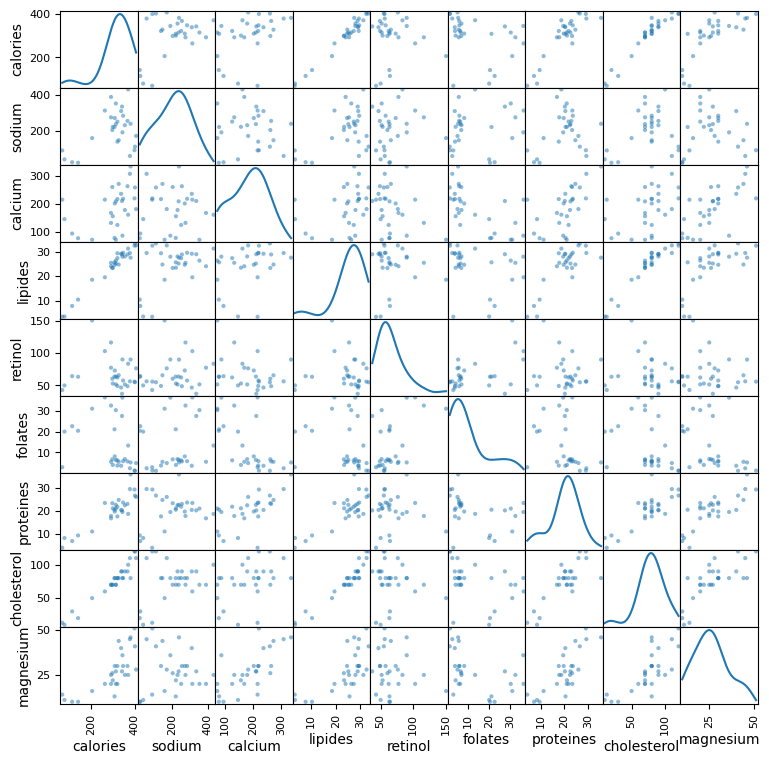

In [28]:
# croisement 2 à 2 des variables

pd.plotting.scatter_matrix(fromage, figsize=(9, 9), diagonal="kde")
plt.show()

# Partie 2 : Méthode des centres mobiles


In [29]:
import numpy as np
from sklearn import cluster

np.random.seed(0)
kmeans = cluster.KMeans(n_clusters=4, n_init=10)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
df = pd.DataFrame(fromage.index[idk], kmeans.labels_[idk])
print(df)
print(kmeans.transform(fromage))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

<span style="color: #87ceeb;">La première instance appartient au 1er cluster car la distance minimale de cette instance aux autres cluster est celle du 1er cluster</span>


In [30]:
for i in range(4):
    print(f"Les elements du cluster {i} sont:\n", df[df.index == i], "\n")

Les elements du cluster 0 sont:
              Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle 

Les elements du cluster 1 sont:
       Fromages
1     Beaufort
1  SaintPaulin
1      Cheddar
1        Comte
1         Edam
1     Emmental
1     Vacherin
1     Parmesan 

Les elements du cluster 2 sont:
              Fromages
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat. 

Les elements du cluster 3 sont:
       Fromages
3    Maroilles
3      Morbier
3       Cantal
3    Camembert
3     Pyrenees
3    Reblochon
3   Rocquefort
3         Bleu
3      Babybel
3  Fr.fondu.45 



Donnez les attributs des centres de chaque cluster


In [31]:
cluster_centres = kmeans.cluster_centers_

print(cluster_centres)

[[297.85714286 239.78571429 103.84285714  24.91428571  83.92857143
   23.05714286  18.97142857  71.42857143  21.71428571]
 [363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [329.8        306.6        206.82        26.87        64.24
   11.91        21.08        82.          27.4       ]]


Aide à la détection du nombre adéquat de groupes


[0.50681355 0.37299771 0.3369907  0.35737616 0.30111135 0.2888388
 0.27175259 0.27082924 0.24785549]


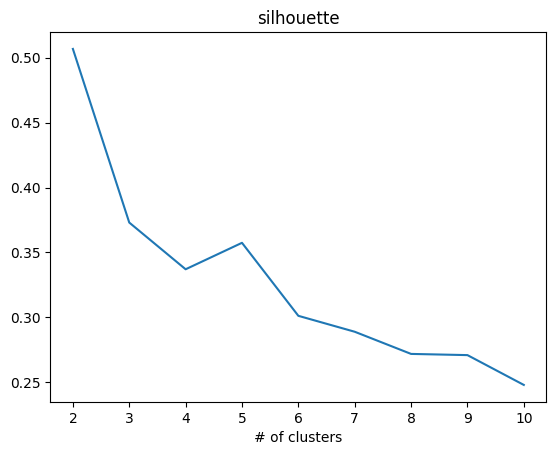

In [32]:
from sklearn import metrics

# utilisation de la métrique "silhouette"
res = np.arange(9, dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k + 2, n_init=10)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage, km.labels_)
print(res)
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2, 11, 1), (res))
plt.show()

Quelle est la meilleure valeur de k (nombre de clusters) selon la métrique silhouette ?


<span style="color: #87ceeb;">Le meilleur nombre de clusters est 3 ou 5. Nous n'avons pas choisi 2 car le nombre de clusters est trop petit. Si nous voulons une classification plus générique, nous choisissons 3. Si nous voulons qu'elle soit plus spécifique, nous choisissons 5. Cependant, si nous choisissons 4, nous aurons un problème avec les clusters 1 et 4 car ils sont trop proches.</span>


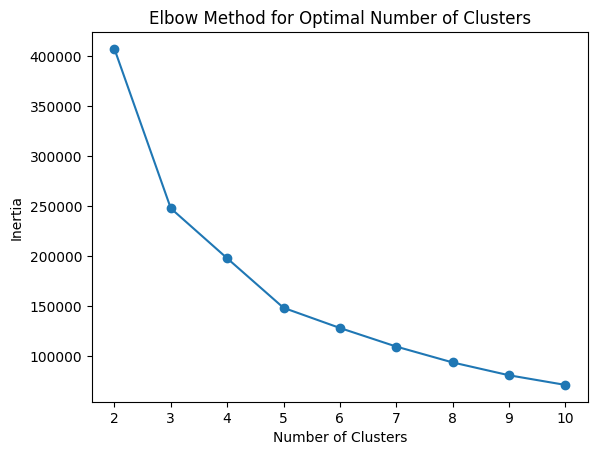

In [33]:
inertia_values = np.arange(9, dtype="double")

for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k + 2, n_init=10)
    km.fit(fromage)
    inertia_values[k] = km.inertia_

plt.plot(np.arange(2, 11), inertia_values, marker="o")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

<span style="color: #87ceeb;">The elbow "appears" when we are at three clusters thus it is the optimal number of clusters given by this method</span>


# Partie 3 : Classification ascendante hiérarchique


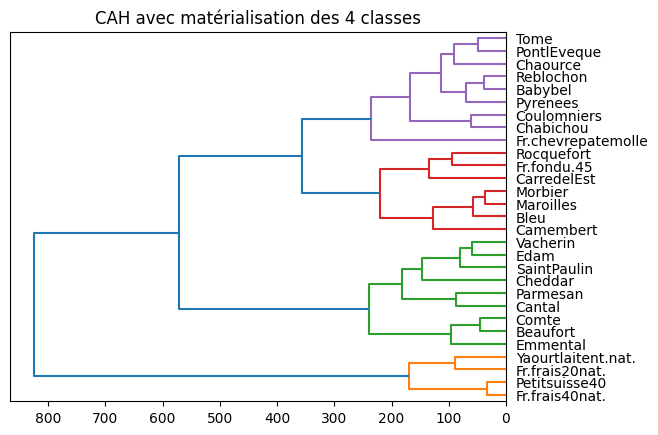

             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(fromage, method="ward", metric="euclidean")

plt.title("CAH avec matérialisation des 4 classes")
dendrogram(Z, labels=fromage.index, orientation="left", color_threshold=255)
plt.show()
# affichage du dendrogramme
groupes_cah = fcluster(Z, t=255, criterion="distance")
# index triés des groupes
idg = np.argsort(groupes_cah)
# affichage des observations et leurs groupes
df_cah = pd.DataFrame(fromage.index[idg], groupes_cah[idg])
print(df_cah)

In [35]:
for i in range(1, 5):
    print(f"Les elements du cluster {i} sont:\n", df_cah[df_cah.index == i], "\n")

Les elements du cluster 1 sont:
              Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat. 

Les elements du cluster 2 sont:
       Fromages
2  SaintPaulin
2     Beaufort
2       Cantal
2     Parmesan
2      Cheddar
2        Comte
2         Edam
2     Emmental
2     Vacherin 

Les elements du cluster 3 sont:
       Fromages
3   Rocquefort
3      Morbier
3    Maroilles
3  CarredelEst
3    Camembert
3         Bleu
3  Fr.fondu.45 

Les elements du cluster 4 sont:
              Fromages
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle 



Donnez la correspondance entre les groupes de la CAH et les clusters de Kmeans en utilisant la méthode pandas.crosstab


In [36]:
pd.crosstab(groupes_cah, kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,0,8,0,1
3,1,0,0,6
4,6,0,0,3


<div style="color: #87ceeb;">Nous constatons que le Cluster 2 est bien classifié (0 0 4 0) à la fois dans CAH et K-Means.

Il en va de même pour le Cluster 1 (0 8 0 1) car il a correctement classé 8 instances et 1 non..

Le Cluster 3 est également bien classé (1 0 0 6) car il a correctement classé 6 instances et 1 non.

Cependant, le Cluster 4 (6 0 0 3) n'est pas bien classé car 6 est bien classé et 3 ne l'est pas, ce qui représente un nombre important. Il nous faut donc un expert pour examiner ces 3 instances et déterminer si K-Means les classifie mieux que CAH pour conclure qui est le meilleur algorithme de classification.</div>


# Partie 4 : Interprétation des classes


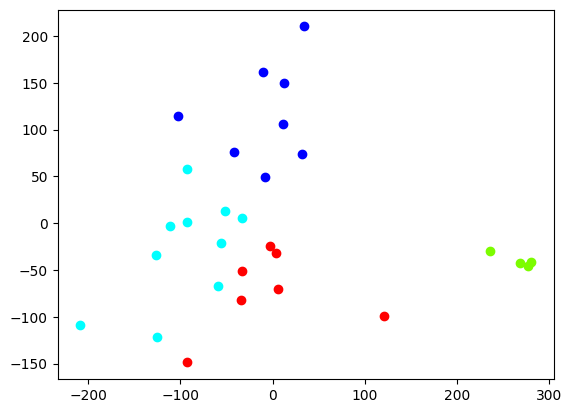

In [37]:
from sklearn.decomposition import PCA

acp = PCA(n_components=2).fit_transform(fromage)
for couleur, k in zip(["red", "blue", "lawngreen", "aqua"], [0, 1, 2, 3]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=couleur)
plt.show()

Interprétez les résultats


<span style="color: #87ceeb;">Les clusters 0 et 3 présentent des points très proches les unes des autres mais celles du cluster 2 sont loins des autres points donc on dit qu'ils sont bien classifiés.</span>


Appliquez sur le même jeu de données, la méthode de clustering CAH du package
sklearn.cluster.AgglomerativeClustering. Comparez les résultats.


In [38]:
from sklearn.cluster import AgglomerativeClustering

agg_c = AgglomerativeClustering(n_clusters=4)
agg_c.fit(fromage)
idk_ = np.argsort(agg_c.labels_)
df_cah_sklearn = pd.DataFrame(fromage.index[idk_], agg_c.labels_[idk_])
print(df_cah_sklearn)

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


In [39]:
for i in range(4):
    print(
        f"Les elements du cluster {i} sont:\n",
        df_cah_sklearn[df_cah_sklearn.index == i],
        "\n",
    )

Les elements du cluster 0 sont:
       Fromages
0  SaintPaulin
0     Beaufort
0     Parmesan
0       Cantal
0      Cheddar
0        Comte
0     Vacherin
0         Edam
0     Emmental 

Les elements du cluster 1 sont:
       Fromages
1  CarredelEst
1   Rocquefort
1      Morbier
1    Maroilles
1  Fr.fondu.45
1    Camembert
1         Bleu 

Les elements du cluster 2 sont:
              Fromages
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle 

Les elements du cluster 3 sont:
              Fromages
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat. 



In [40]:
pd.crosstab(agg_c.labels_, groupes_cah)

col_0,1,2,3,4
row_0,,,,
0,0,9,0,0
1,0,0,7,0
2,0,0,0,9
3,4,0,0,0


<span style="color: #87ceeb;">Les clusters obtenu par l'algorithme du package sklearn sont identiques par rapport à ceux obtenus par le package scipy</span>


In [41]:
pd.crosstab(agg_c.labels_, kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
0,0,8,0,1
1,1,0,0,6
2,6,0,0,3
3,0,0,4,0


<span style="color: #87ceeb;">On obtient ainsi des résultats équivalents en comparants les clusters de l'algorithme k-means et CAH du sklearn</span>


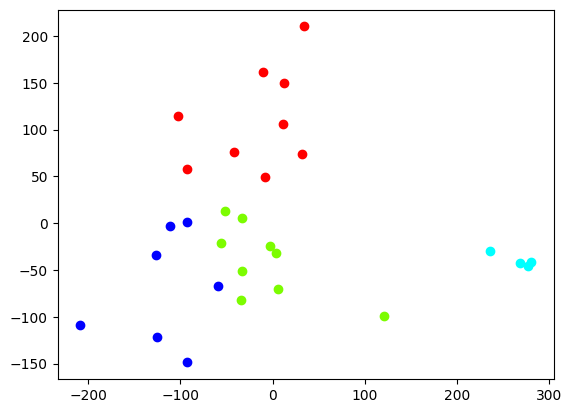

In [42]:
from sklearn.decomposition import PCA

acp = PCA(n_components=2).fit_transform(fromage)
for couleur, k in zip(["red", "blue", "lawngreen", "aqua"], [0, 1, 2, 3]):
    plt.scatter(acp[agg_c.labels_ == k, 0], acp[agg_c.labels_ == k, 1], c=couleur)
plt.show()

Implémentez un algorithme hiérarchique descendant (divisive clustering) basé sur
l’utilisation de k-means


In [43]:
from scipy.spatial.distance import pdist, squareform


def calculate_diameter(fromage, cluster):
    distance_matrix = squareform(pdist(fromage.iloc[cluster], "euclidean"))
    return np.max(distance_matrix)


def find_cluster_with_max_diameter(clusters, fromage):
    max_diameter = float("-inf")
    cluster_to_split = None

    for cluster in clusters:
        diameter = calculate_diameter(fromage, cluster)
        if diameter > max_diameter:
            max_diameter = diameter
            cluster_to_split = cluster

    return cluster_to_split

In [44]:
from sklearn.cluster import KMeans


def divisive_kmeans_clustering(data, k):
    clusters = [list(range(len(data)))]
    while len(clusters) < k:
        cluster_to_split = find_cluster_with_max_diameter(clusters, data)

        kmeans = KMeans(n_clusters=2, n_init=10)
        cluster_assignments = kmeans.fit_predict(data.iloc[cluster_to_split])

        new_clusters = [
            np.array(cluster_to_split)[cluster_assignments == i].tolist()
            for i in range(2)
        ]

        clusters.remove(cluster_to_split)
        clusters.extend(new_clusters)

    return clusters

In [45]:
resulting_clusters = divisive_kmeans_clustering(fromage, 4)

labels = np.zeros(len(fromage), dtype=int)


for i, cluster in enumerate(resulting_clusters):
    for idx in cluster:
        labels[idx] = i

idk_ = np.argsort(labels)
df = pd.DataFrame(fromage.index[idk_], labels[idk_])
print(df)

             Fromages
0  Yaourtlaitent.nat.
0       Petitsuisse40
0      Fr.frais40nat.
0      Fr.frais20nat.
0  Fr.chevrepatemolle
1            Parmesan
1            Vacherin
1            Emmental
1               Comte
1                Edam
1              Cantal
1         SaintPaulin
1            Beaufort
1             Cheddar
2         Coulomniers
2         PontlEveque
2            Chaource
2           Chabichou
2                Tome
2             Babybel
2            Pyrenees
3          Rocquefort
3           Reblochon
3         CarredelEst
3           Maroilles
3           Camembert
3                Bleu
3             Morbier
3         Fr.fondu.45


In [46]:
for i in range(4):
    print(
        f"Les elements du cluster {i} sont:\n",
        df[df.index == i],
        "\n",
    )

Les elements du cluster 0 sont:
              Fromages
0  Yaourtlaitent.nat.
0       Petitsuisse40
0      Fr.frais40nat.
0      Fr.frais20nat.
0  Fr.chevrepatemolle 

Les elements du cluster 1 sont:
       Fromages
1     Parmesan
1     Vacherin
1     Emmental
1        Comte
1         Edam
1       Cantal
1  SaintPaulin
1     Beaufort
1      Cheddar 

Les elements du cluster 2 sont:
       Fromages
2  Coulomniers
2  PontlEveque
2     Chaource
2    Chabichou
2         Tome
2      Babybel
2     Pyrenees 

Les elements du cluster 3 sont:
       Fromages
3   Rocquefort
3    Reblochon
3  CarredelEst
3    Maroilles
3    Camembert
3         Bleu
3      Morbier
3  Fr.fondu.45 



In [47]:
pd.crosstab(labels, groupes_cah)

col_0,1,2,3,4
row_0,,,,
0,4,0,0,1
1,0,9,0,0
2,0,0,0,7
3,0,0,7,1


<span style="color: #87ceeb;">On a quelques différences avec les clusters de l'algorithme CAH et ceci</span>

In [48]:
pd.crosstab(labels, kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
0,1,0,4,0
1,0,8,0,1
2,5,0,0,2
3,1,0,0,7
